This portion aims to rerank basketball players in 9 Cat fantasy. The conventional way of ranking using Z-Scores makes an often invalid assumption that player statistics follow a normal distribution. This portion aims to reduce skewness of data to create greater resemble with normal distribution.

In [6]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import shapiro

In [2]:
fantasy_data = pd.read_csv("Cleaned Stats.csv")

Data Exploration

In [66]:
#right skewed power transform function
def right_skew_pow_transform(dataframe):
    minimum_val = min(dataframe)
    adjustment = 0 
    if minimum_val < 0:
        adjustment = 0 - minimum_val
    p_value = 0
    t_pow = 1
    i = 0.9
    while i >= 0.00001:
        t_data = dataframe.transform(lambda x: math.pow(x+adjustment,i))
        res = shapiro(t_data)
        if res[1] > p_value:
            p_value = res[1]
            t_pow = i
        i -= 0.00001
    
    return ([p_value,t_pow,adjustment])

def left_skew_pow_transform(dataframe):
    minimum_val = min(dataframe)
    adjustment = 0 
    if minimum_val < 0:
        adjustment = 0 - minimum_val
    p_value = 0
    t_pow = 1
    i = 1.1
    while i <= 10:
        t_data = dataframe.transform(lambda x: math.pow(x+adjustment,i))
        res = shapiro(t_data)
        if res[1] > p_value:
            p_value = res[1]
            t_pow = i
        i += 0.0001
    
    return ([p_value,t_pow,adjustment])

def log_transform(dataframe):
    minimum_val = min(dataframe)
    adjustment = 1 - minimum_val
    t_data = dataframe.transform(lambda x: math.log(x+adjustment))
    res = shapiro(t_data)
    p_value = res[1]
    return [p_value,adjustment]

Points Per Game Exploration

C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ShapiroResult(statistic=0.8867167234420776, pvalue=6.94407205454181e-17)

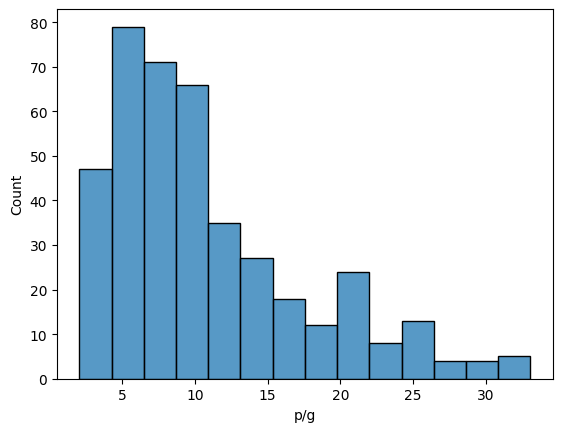

In [37]:
sns.histplot(data = fantasy_data, x="p/g")
shapiro(fantasy_data["p/g"])

In [38]:
results = right_skew_pow_transform(fantasy_data["p/g"])
print("power transform p_value and power:", results)
log_results = log_transform(fantasy_data["p/g"])
print("log transform p_value: ", log_results)

power transform p_value and power: [0.0009035370894707739, 1.0000001461165631e-05]
log transform p_value:  0.004890309646725655


C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='t p/g', ylabel='Count'>

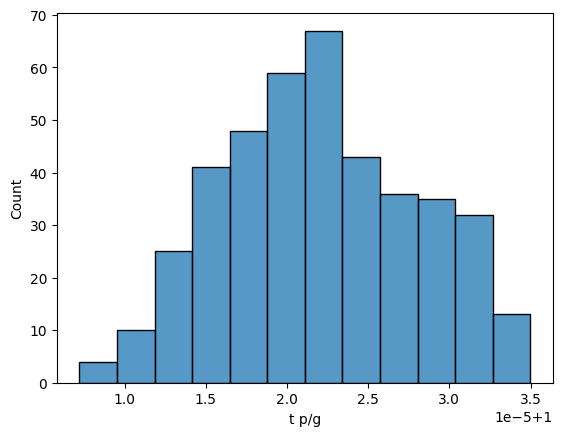

In [39]:
fantasy_data["t p/g"] = fantasy_data["p/g"].transform(lambda x: math.pow(x,1.0000001461165631e-05))
sns.histplot(data = fantasy_data, x="t p/g")

Assists per game

C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ShapiroResult(statistic=0.8358539342880249, pvalue=2.8608707107045626e-20)

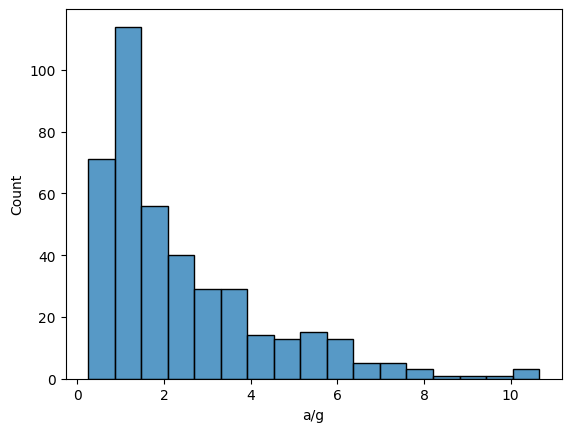

In [36]:
sns.histplot(data = fantasy_data, x="a/g")
shapiro(fantasy_data["a/g"])

In [32]:
results = right_skew_pow_transform(fantasy_data["a/g"])
print("power transform p_value and power:", results)
log_results = log_transform(fantasy_data["a/g"])
print("log transform p_value: ", log_results)

power transform p_value and power: [0.0007110728183761239, 2.0000001461165632e-05]
log transform p_value:  4.153881683066629e-09


C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='t a/g', ylabel='Count'>

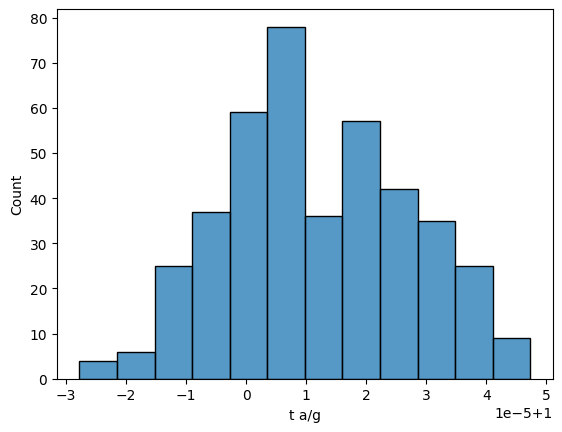

In [35]:
fantasy_data["t a/g"] = fantasy_data["a/g"].transform(lambda x: math.pow(x,2.0000001461165632e-05))
sns.histplot(data = fantasy_data, x="t a/g")

3 pointers made per game

C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ShapiroResult(statistic=0.9406610727310181, pvalue=8.79179801877017e-12)

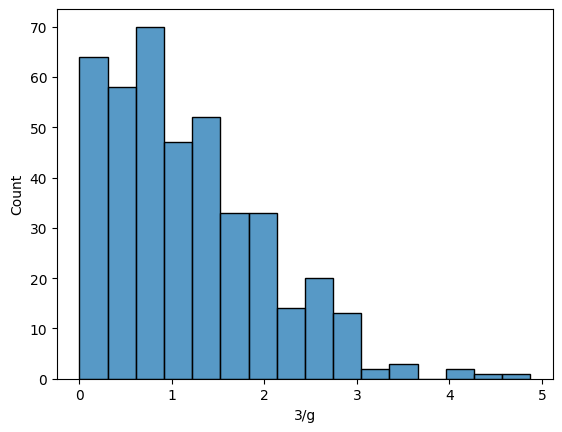

In [40]:
sns.histplot(data = fantasy_data, x="3/g")
shapiro(fantasy_data["3/g"])

In [41]:
results = right_skew_pow_transform(fantasy_data["3/g"])
print("power transform p_value and power:", results)
log_results = log_transform(fantasy_data["3/g"])
print("log transform p_value: ", log_results)

power transform p_value and power: [0.000711615604814142, 0.6177000000012848]
log transform p_value:  1.5333940609707497e-05


C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='t 3/g', ylabel='Count'>

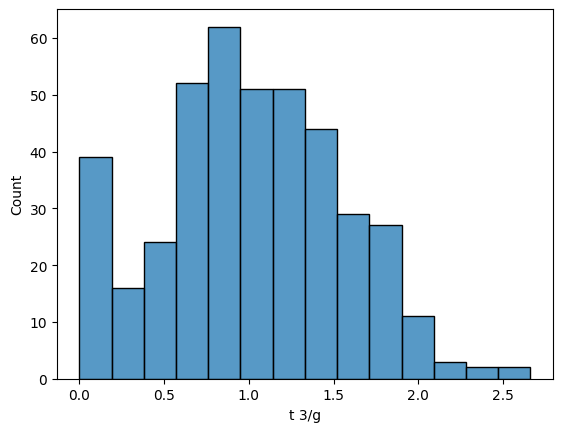

In [42]:
fantasy_data["t 3/g"] = fantasy_data["3/g"].transform(lambda x: math.pow(x,0.6177000000012848))
sns.histplot(data = fantasy_data, x="t 3/g")

rebounds per game

C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ShapiroResult(statistic=0.8997939229011536, pvalue=7.718726433499925e-16)

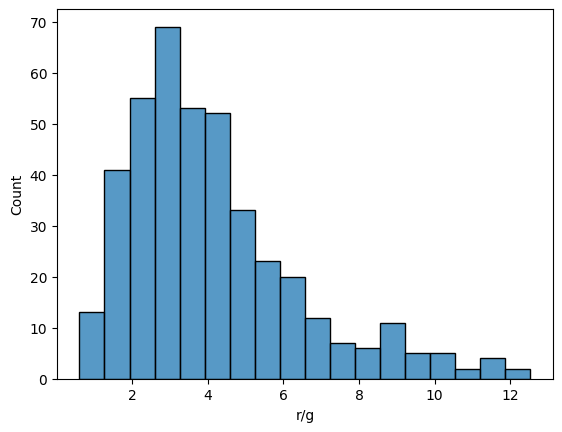

In [43]:
sns.histplot(data = fantasy_data, x="r/g")
shapiro(fantasy_data["r/g"])

In [44]:
results = right_skew_pow_transform(fantasy_data["r/g"])
print("power transform p_value and power:", results)
log_results = log_transform(fantasy_data["r/g"])
print("log transform p_value: ", log_results)

power transform p_value and power: [0.4614061415195465, 0.056830000001467894]
log transform p_value:  0.2977760434150696


C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='t r/g', ylabel='Count'>

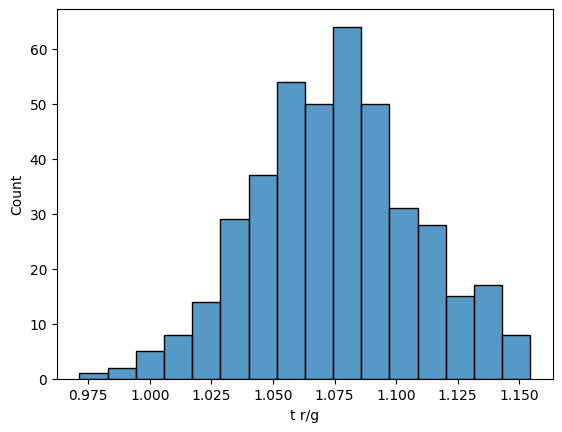

In [45]:
fantasy_data["t r/g"] = fantasy_data["r/g"].transform(lambda x: math.pow(x,0.056830000001467894))
sns.histplot(data = fantasy_data, x="t r/g")

steals per game

C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ShapiroResult(statistic=0.9505380392074585, pvalue=1.577675767805431e-10)

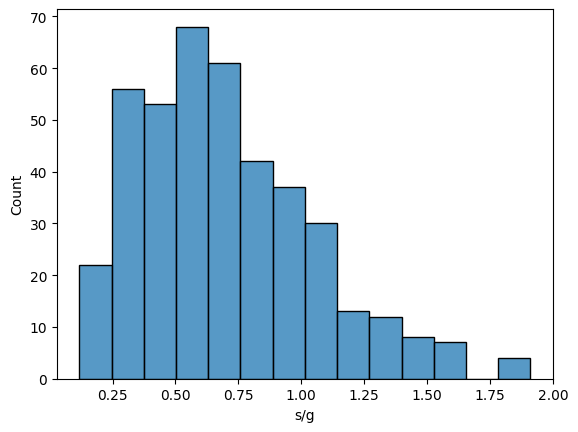

In [46]:
sns.histplot(data = fantasy_data, x="s/g")
shapiro(fantasy_data["s/g"])

In [47]:
results = right_skew_pow_transform(fantasy_data["s/g"])
print("power transform p_value and power:", results)
log_results = log_transform(fantasy_data["s/g"])
print("log transform p_value: ", log_results)

power transform p_value and power: [0.44182559847831726, 0.2934800000016139]
log transform p_value:  0.0005119122215546668


C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='t s/g', ylabel='Count'>

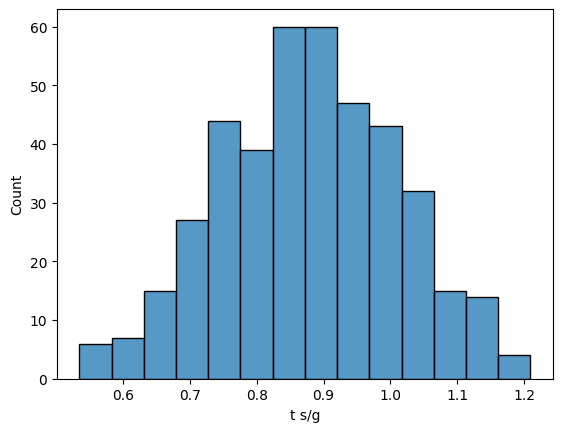

In [48]:
fantasy_data["t s/g"] = fantasy_data["s/g"].transform(lambda x: math.pow(x,0.2934800000016139))
sns.histplot(data = fantasy_data, x="t s/g")

Blocks per game

C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ShapiroResult(statistic=0.7572994828224182, pvalue=3.339079395566826e-24)

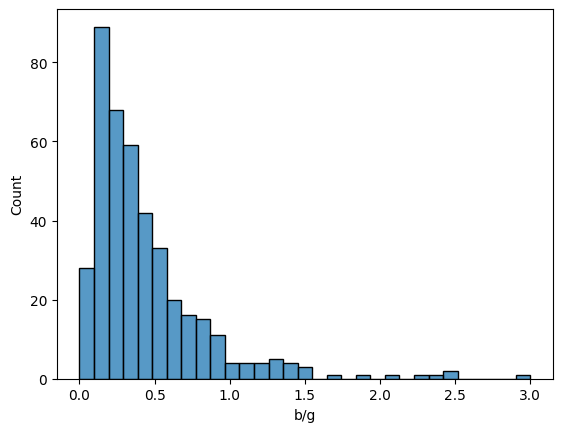

In [49]:
sns.histplot(data = fantasy_data, x="b/g")
shapiro(fantasy_data["b/g"])

In [50]:
results = right_skew_pow_transform(fantasy_data["b/g"])
print("power transform p_value and power:", results)
log_results = log_transform(fantasy_data["b/g"])
print("log transform p_value: ", log_results)

power transform p_value and power: [3.756394733045454e-07, 0.29594000000161635]
log transform p_value:  4.7849327941758854e-17


C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='t b/g', ylabel='Count'>

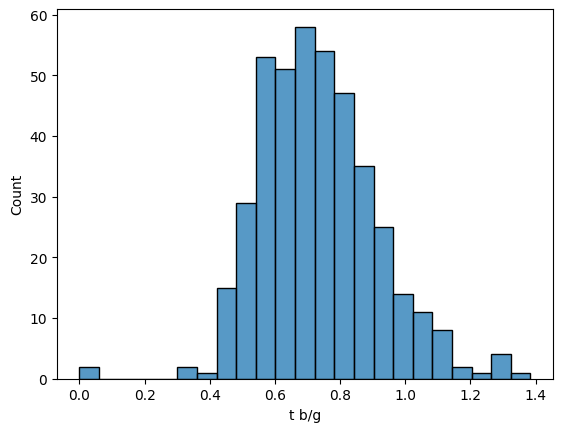

In [51]:
fantasy_data["t b/g"] = fantasy_data["b/g"].transform(lambda x: math.pow(x,0.29594000000161635))
sns.histplot(data = fantasy_data, x="t b/g")

Weighted Freethrows

C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ShapiroResult(statistic=0.8619211912155151, pvalue=1.1930251232947916e-18)

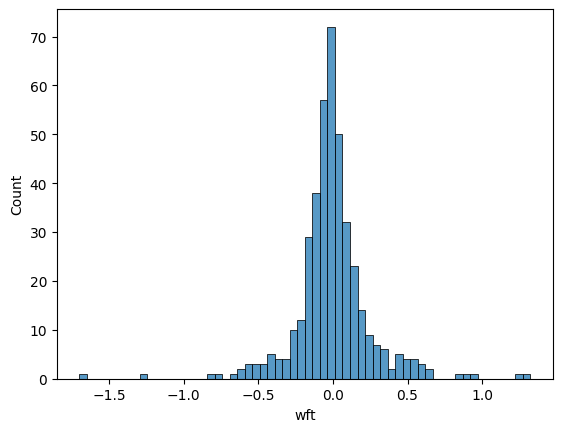

In [53]:
sns.histplot(data = fantasy_data, x="wft")
shapiro(fantasy_data["wft"])

Weighted FG

C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ShapiroResult(statistic=0.9465178847312927, pvalue=4.673195164173194e-11)

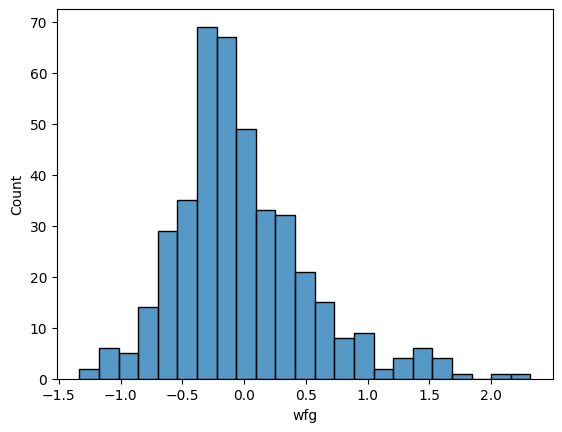

In [55]:
sns.histplot(data = fantasy_data, x="wfg")
shapiro(fantasy_data["wfg"])

In [58]:
results = right_skew_pow_transform(fantasy_data["wfg"])
print("power transform p_value and power:", results)
log_results = log_transform(fantasy_data["wfg"])
print("log transform p_value and adjustments: ", log_results)

power transform p_value and power: [8.344546586158685e-06, 0.5977900000013754]
log transform p_value:  [0.0009747919975779951, 2.3329541540027106]


C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='t wfg', ylabel='Count'>

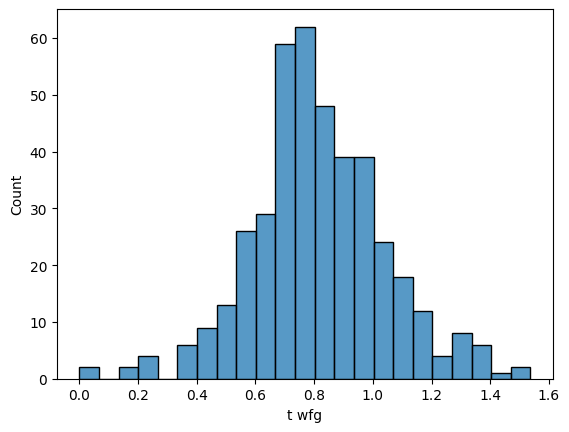

In [59]:
fantasy_data["t wfg"] = fantasy_data["wfg"].transform(lambda x: math.log(x+2.3329541540027106))
sns.histplot(data = fantasy_data, x="t wfg")

Turnovers

C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


ShapiroResult(statistic=0.8913910388946533, pvalue=1.6033972379032342e-16)

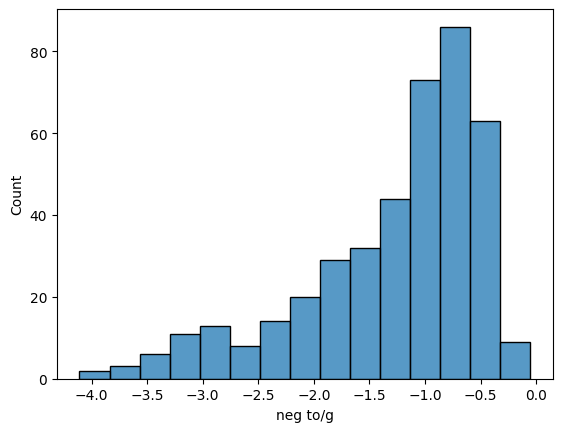

In [60]:
sns.histplot(data = fantasy_data, x="neg to/g")
shapiro(fantasy_data["neg to/g"])

In [67]:
results = left_skew_pow_transform(fantasy_data["neg to/g"])
print("power transform p_value, power and adjustment:", results)


power transform p_value, power and adjustment: [1.0824343377180412e-07, 3.11320000000225, 4.109589041]


C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\SQ XPS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='t to/g', ylabel='Count'>

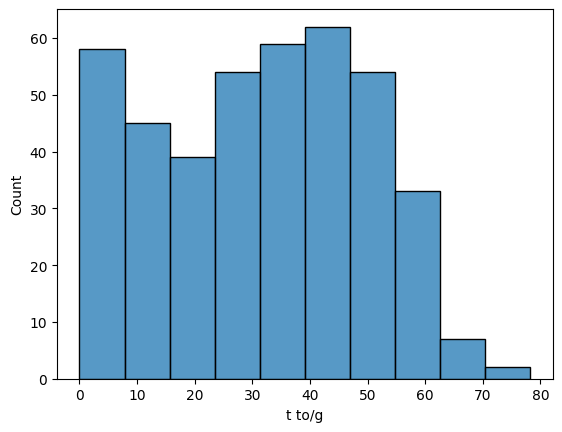

In [68]:
fantasy_data["t to/g"] = fantasy_data["neg to/g"].transform(lambda x: math.pow(x+4.109589041,3.11320000000225))
sns.histplot(data = fantasy_data, x="t to/g")

In [70]:
fantasy_data.to_csv("Transformed Stats.csv")

In [71]:
transformed_data = pd.read_csv("Transformed Stats.csv")

In [72]:
transformed_data["pV"] = (transformed_data["t p/g"]-transformed_data["t p/g"].mean())/transformed_data["t p/g"].std()

In [73]:
curr = ["t p/g","t a/g","t 3/g", "t r/g", "t s/g", "t b/g", "t wft", "t wfg", "t to/g"]
new = ["pV", "aV", "3V", "rV", "sV", "bV", "ftV", "fgV", "toV"]
for i in range (0,len(["t p/g","t a/g","t 3/g", "t r/g", "t s/g", "t b/g", "t wft", "t wfg", "t to/g"])):
    transformed_data[new[i]] = (transformed_data[curr[i]]-transformed_data[curr[i]].mean())/transformed_data[curr[i]].std()



In [77]:

transformed_data["V"] = transformed_data[new].sum(axis=1)
transformed_data["VPuntTo"] = transformed_data["V"] - transformed_data["toV"]

In [78]:
transformed_data.to_csv("final results.csv")